## TF-IDF: Term frequency-inverse document frequency

**What is TF-IDF?**

It is the Term Frequency-Inverse Document Frequency model which is also a bag-of-words model. It is different from the regular corpus because it down weights the tokens i.e. words appearing frequently across documents. During initialisation, this tf-idf model algorithm expects a training corpus having integer values (such as Bag-of-Words model).

Then after that at the time of transformation, it takes a vector representation and returns another vector representation. The output vector will have the same dimensionality but the value of the rare features (at the time of training) will be increased. It basically converts integer-valued vectors into real-valued vectors.

**How It Is Computed?**

TF-IDF model computes tfidf with the help of following two simple steps −

**Step 1: Multiplying local and global component**

In this first step, the model will multiply a local component such as TF (Term Frequency) with a global component such as IDF (Inverse Document Frequency).

**Step 2: Normalise the Result**

Once done with multiplication, in the next step TFIDF model will normalize the result to the unit length.

As a result of these above two steps frequently occurred words across the documents will get down-weighted.

**How to get TF-IDF Weights?**

In order to get TF-IDF weights, first need to train the corpus and the then apply that corpus within the tfidf model.

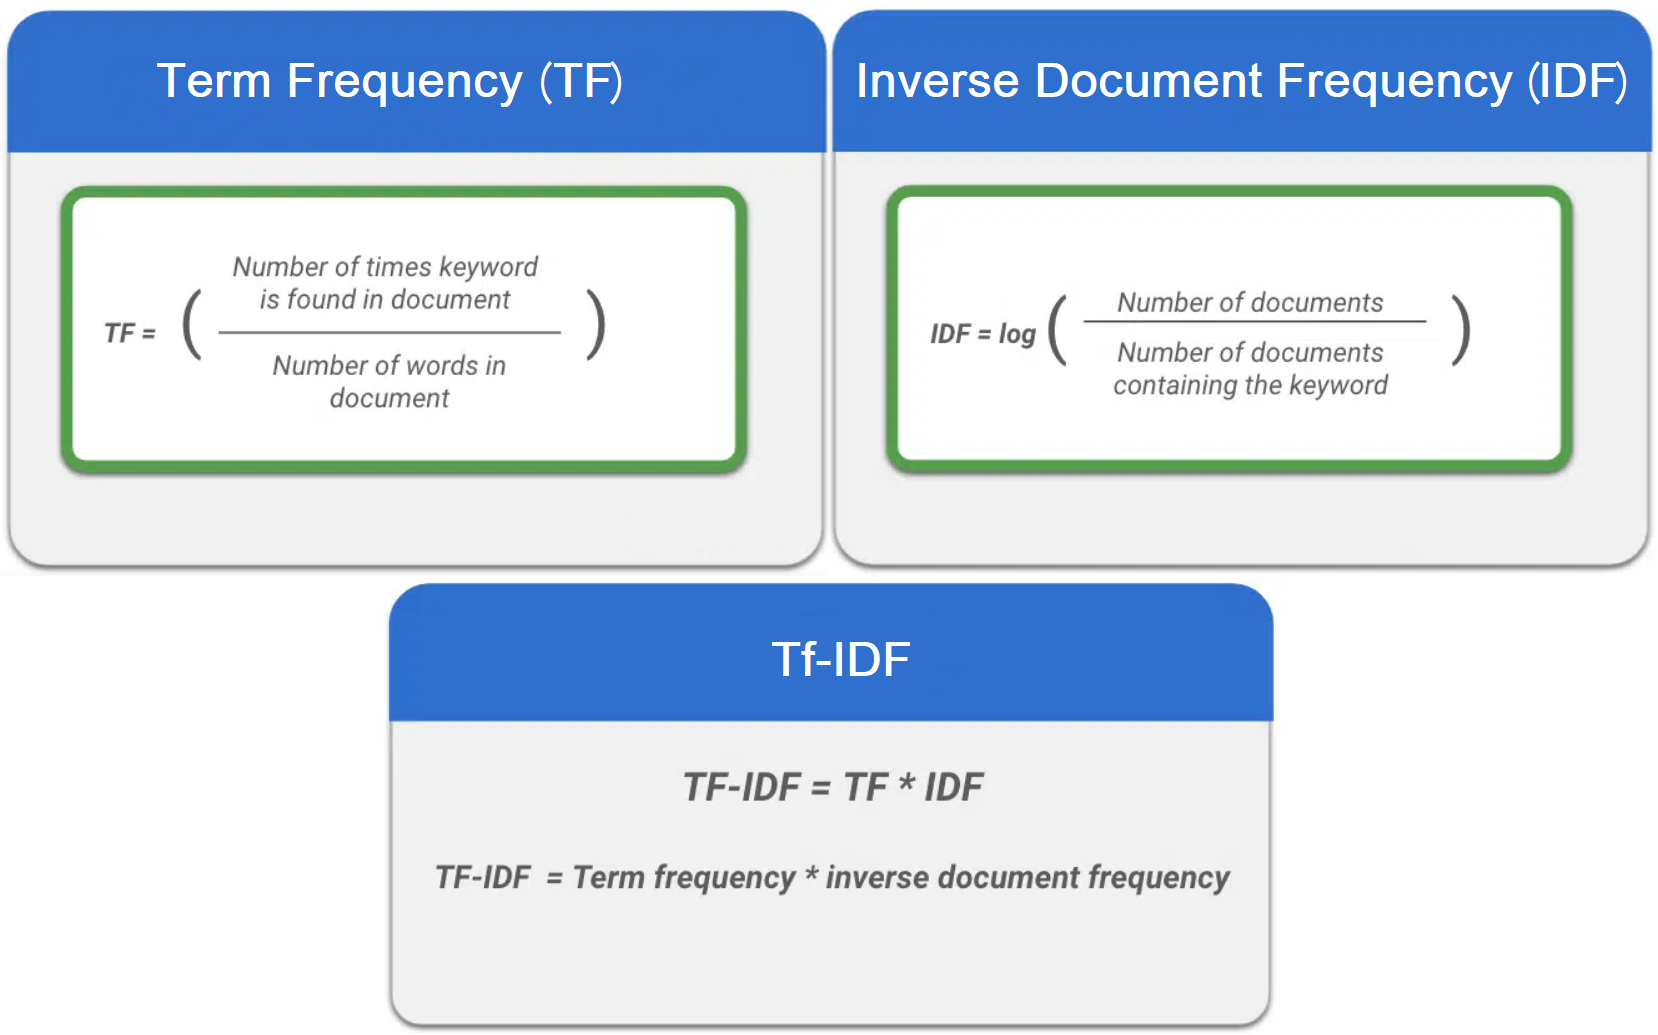

## Illustrative example of TF-IDF calculation

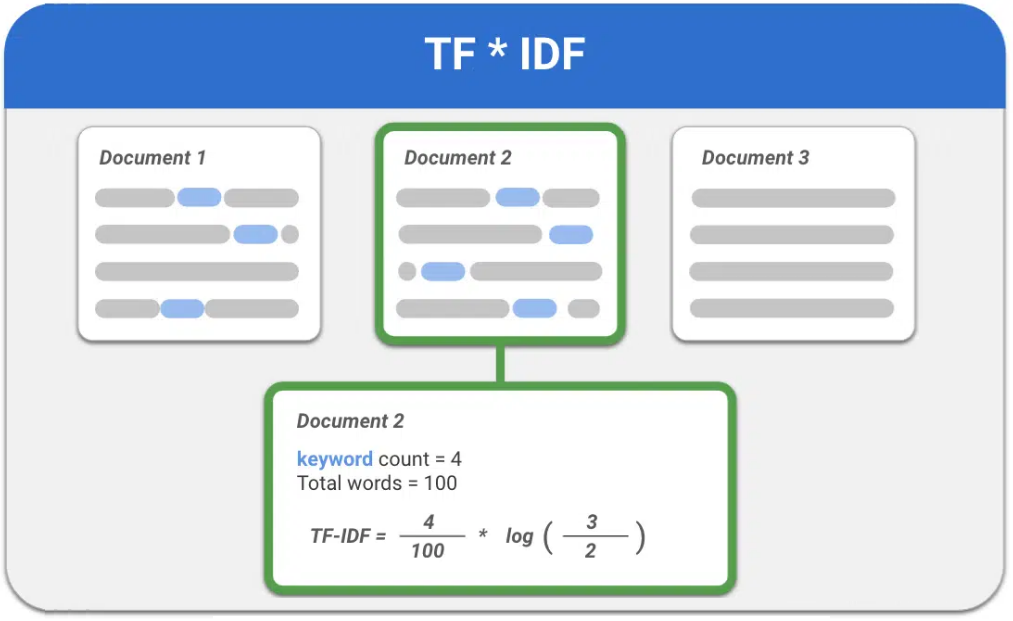

## Import all the necessary packages

In [ ]:
import json
import spacy
import gensim
import numpy as np
from gensim import corpora
from gensim.models import TfidfModel

In [ ]:
# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading tokenized texts cleared of stopwords

In [ ]:
docs = 'drive/MyDrive/Colab Notebooks/cleaned_text_tokenized_sw.json'
# read all lines at once
with open(docs, 'r') as f:
    cleaned_text_tokenized_sw = json.load(f)

In [ ]:
print(cleaned_text_tokenized_sw[0])

['david', 'stagg', 'david', 'stagg', 'born', 'october', 'townsville', 'queensland', 'australian', 'professional', 'rugby', 'league', 'footballer', 'appearance', 'queensland', 'state', 'origin', 'played', 'brisbane', 'broncos', 'won', 'nrl', 'premiership', 'canterbury', 'bankstown', 'bulldogs', 'known', 'high', 'workload', 'played', 'fill', 'career', 'stagg', 'played', 'junior', 'football', 'norms', 'trl', 'joining', 'brisbane', 'broncos', 'nrl', 'debut', 'round', 'nrl', 'season', 'canterbury', 'bankstown', 'bulldogs', 'stagg', 'set', 'new', 'record', 'tackles', 'game', 'tackles', 'cronulla', 'sutherland', 'sharks', 'record', 'beaten', 'stagg', 'representative', 'debut', 'played', 'game', 'queensland', 'state', 'origin', 'dropped', 'later', 'year', 'played', 'centre', 'broncos', 'nrl', 'grand', 'final', 'victory', 'winning', 'grand', 'final', 'broncos', 'stagg', 'signed', 'year', 'deal', 'canterbury', 'bankstown', 'bulldogs', 'season', 'canterbury', 'stagg', 'played', 'games', 'club', '

## Create an object of corpora.Dictionary()

In [ ]:
dictionary = corpora.Dictionary(cleaned_text_tokenized_sw)

## Filter out tokens in the dictionary by their frequency

Dictionary filtering is done using the following parameters:

no_below – Keep tokens which are contained in at least no_below documents,

no_above – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).

In [ ]:
dictionary.filter_extremes(no_below=20, no_above=0.8)

### Saving dictionary to json file

In [ ]:
with open('drive/MyDrive/Colab Notebooks/gensim_vocabulary.json', 'w') as f:
    json.dump(dict(dictionary), f, indent=4)

In [ ]:
# displaying part of the dictionary for visibility
lst = list(dictionary.items())
part_dictionary = dict(lst[:10])
print(part_dictionary)

{0: 'anz', 1: 'appearance', 2: 'arch', 3: 'australian', 4: 'bankstown', 5: 'beaten', 6: 'born', 7: 'brisbane', 8: 'broncos', 9: 'bulldogs'}


### Training Bag-of-Word corpus (Passing tokenized sentences to the dictionary.doc2bow() object)

In [ ]:
BoW_corpus = [dictionary.doc2bow(text, allow_update=True) for text in cleaned_text_tokenized_sw]

### Getting word identifiers and their frequencies in articles
Word identifiers and their frequencies in articles can be written in json for view

In [ ]:
# with open('drive/MyDrive/Colab Notebooks/word_frequency.json', 'w') as f:
#     for text in BoW_corpus:
#         temp_list = [[dictionary[id], freq] for id, freq in text]
#         f.write(json.dumps(temp_list) + '\n')

### Applying the trained BoW_corpus in the tfidf models.TfidfModel()

In [ ]:
tfidf_model = TfidfModel(BoW_corpus, smartirs='ntc')

### Getting word IDs and their frequencies in tfidf modeled corpus. Saving the result to a json file

In [ ]:
with open('drive/MyDrive/Colab Notebooks/tfidf_texts.json', 'w') as f:
    for text in tfidf_model[BoW_corpus]:
        temp_list = [[dictionary[id], np.around(freq,decimals=7)] for id, freq in text]
        f.write(json.dumps(temp_list) + '\n')